In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 14

# Lets work on EURO per USD rates Dataset from Quandl

In [3]:
fx = pd.read_csv('BOE-XUDLERD.csv')
fx.head(3)

,Date,Value
0,2017-11-09,0.8603
1,2017-11-08,0.8631
2,2017-11-07,0.8639


In [4]:
fx = fx[::-1]
fx.head(3)

,Date,Value
10836,1975-01-02,0.7633
10835,1975-01-03,0.7585
10834,1975-01-06,0.7524


In [5]:
fx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10837 entries, 10836 to 0
Data columns (total 2 columns):
Date     10837 non-null object
Value    10837 non-null float64
dtypes: float64(1), object(1)
memory usage: 169.4+ KB


#### Making sure Pandas reads desired columns as dates

In [6]:
fx = pd.read_csv('BOE-XUDLERD.csv', parse_dates = ['Date'], dayfirst = False)
fx = fx[::-1]
fx.head(3)

,Date,Value
10836,1975-01-02,0.7633
10835,1975-01-03,0.7585
10834,1975-01-06,0.7524


In [7]:
fx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10837 entries, 10836 to 0
Data columns (total 2 columns):
Date     10837 non-null datetime64[ns]
Value    10837 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 169.4 KB


#### Extracting date features

In [8]:
fx['xyz'] = fx.Date.dt.hour
fx.head()

,Date,Value,xyz
10836,1975-01-02,0.7633,0
10835,1975-01-03,0.7585,0
10834,1975-01-06,0.7524,0
10833,1975-01-07,0.7510,0
10832,1975-01-08,0.7554,0


#### Making date column as index opens up additional features. Good option when dates are unique in each row.

In [9]:
fx = pd.read_csv('BOE-XUDLERD.csv', parse_dates = ['Date'], index_col='Date')
fx = fx[::-1]
fx.head(3)

,Value
Date,
1975-01-02,0.7633
1975-01-03,0.7585
1975-01-06,0.7524


In [10]:
fx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10837 entries, 1975-01-02 to 2017-11-09
Data columns (total 1 columns):
Value    10837 non-null float64
dtypes: float64(1)
memory usage: 169.3 KB


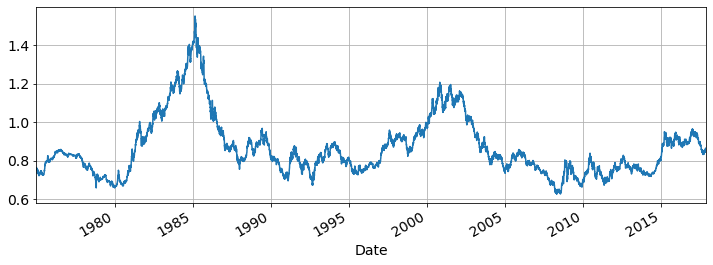

In [11]:
fx.Value.plot()
plt.show()

#### Resample - fixed period average

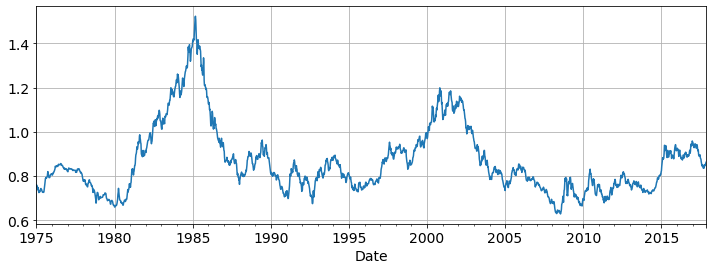

In [13]:
fxw  = fx.Value.resample('W').mean()
fxw.plot()
plt.show()

#### Rolling - Rolling period average

In [14]:
fx['roll_mean'] = fx.Value.rolling(5).mean()
fx.head(10)

,Value,roll_mean
Date,,
1975-01-02,0.7633,NaN
1975-01-03,0.7585,NaN
1975-01-06,0.7524,NaN
1975-01-07,0.7510,NaN
1975-01-08,0.7554,0.75612
1975-01-09,0.7551,0.75448
1975-01-10,0.7534,0.75346
1975-01-13,0.7540,0.75378
1975-01-14,0.7588,0.75534


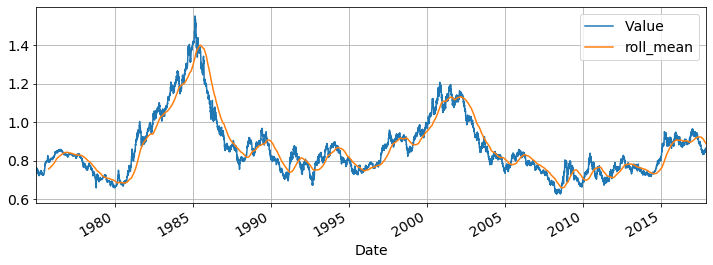

In [15]:
fx['roll_mean'] = fx.Value.rolling(200).mean()
fx.plot()
plt.show()

---
---

## Test for Stationarity - Augmented Dickey Fuller Test
* #### p - value: How likely it is to get a result like this if null hypothesis is True
* #### <font color = red> Always look at p-value in context of null hypothesis
* #### Significance value (alpha): if p- value is below this value we will reject null hypothesis, often 0.05
* #### Null hypothesis of the dickey fuller test is that the value is Non-stationary
* #### So we reject the null hypothesis that data is Non-stationary if the p values is less than 0.05

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
adfuller(fxw)[1] 

0.2541339550926388

### Remember Dickey fuller tests only Trend stationarity. So visualisation of data is not replacable.

In [18]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=52).mean() 
    rolstd = timeseries.rolling(window=52).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries)[1]
    print('p_value: ', dftest)

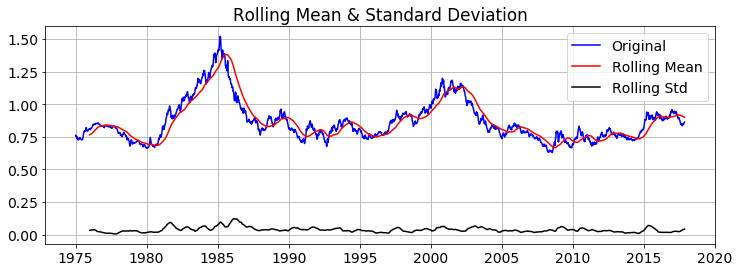

Results of Dickey-Fuller Test:
p_value:  0.2541339550926388


In [19]:
test_stationarity(fxw)

---

## Converting non stationary to stationary
* #### diff() = V(t) - V(t-1), sometimes multiple times
* #### log
* #### sqrt
* #### Proportion = V(t)/V(t-1)
* #### <font color =darkblue>Often simple solution {diff} is the best one

In [20]:
fxw.head()

Date
1975-01-05    0.76090
1975-01-12    0.75346
1975-01-19    0.75546
1975-01-26    0.74388
1975-02-02    0.73902
Freq: W-SUN, Name: Value, dtype: float64

In [21]:
fxw.diff().head()

Date
1975-01-05        NaN
1975-01-12   -0.00744
1975-01-19    0.00200
1975-01-26   -0.01158
1975-02-02   -0.00486
Freq: W-SUN, Name: Value, dtype: float64

In [22]:
fxw.diff().diff().head()

Date
1975-01-05        NaN
1975-01-12        NaN
1975-01-19    0.00944
1975-01-26   -0.01358
1975-02-02    0.00672
Freq: W-SUN, Name: Value, dtype: float64

### Lets check for Stationarity

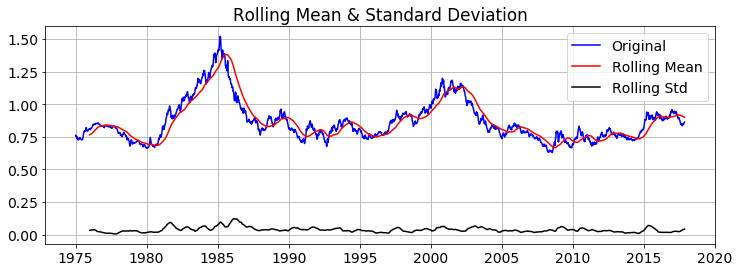

Results of Dickey-Fuller Test:
p_value:  0.2541339550926388


In [23]:
test_stationarity(fxw)

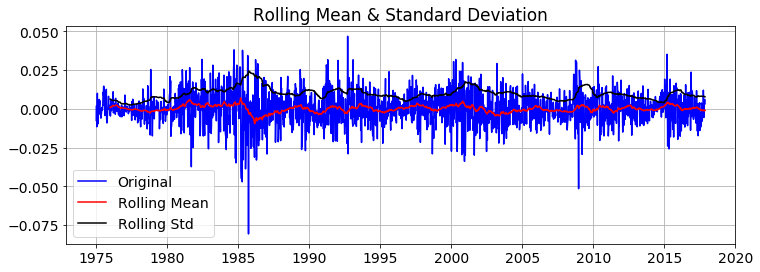

Results of Dickey-Fuller Test:
p_value:  0.0


In [25]:
test_stationarity(fxw.diff().dropna())

#### Motivating example to make data stationarity

In [26]:
pas=pd.read_csv('SeaPlaneTravel.csv', parse_dates=['Month'], index_col='Month')
pas.columns=['Passengers']
pas.head()

,Passengers
Month,
2003-01-01,112
2003-02-01,118
2003-03-01,132
2003-04-01,129
2003-05-01,121


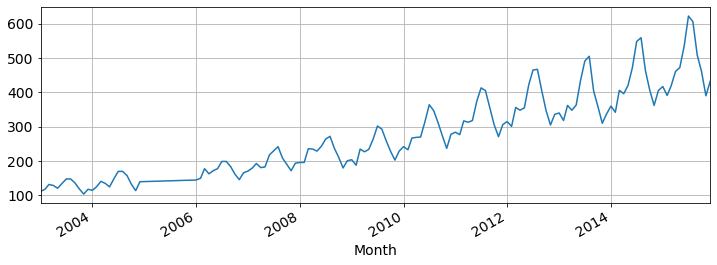

In [27]:
pas.Passengers.plot()
plt.show()

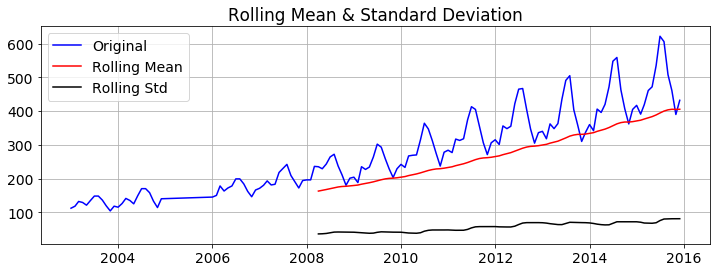

Results of Dickey-Fuller Test:
p_value:  0.9918802434376409


In [28]:
test_stationarity(pas.Passengers)

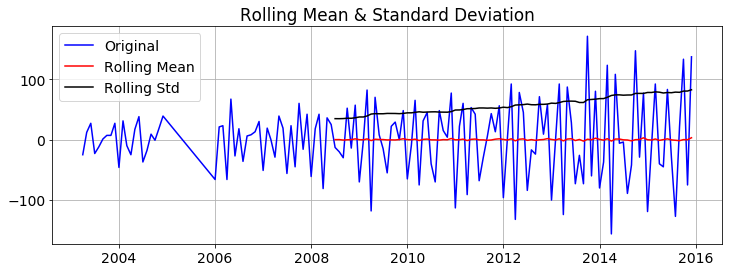

Results of Dickey-Fuller Test:
p_value:  5.0799668839196865e-16


In [31]:
test_stationarity(pas.Passengers.diff().diff().diff().dropna())

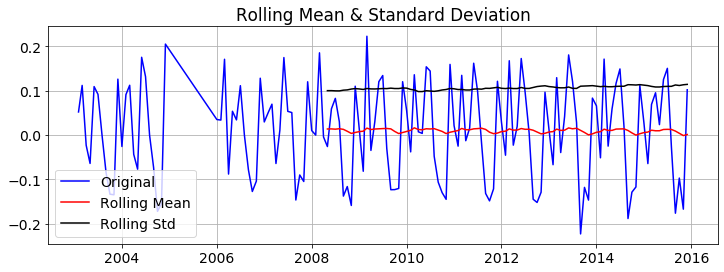

Results of Dickey-Fuller Test:
p_value:  0.0711205481508568


In [35]:
test_stationarity(np.log(pas.Passengers).diff().dropna())

---
---

# <font color = darkgreen>ARMA models
* __Requires the data to be Stationary__

### Auto Regressive AR Model

__AR(1)__

### \begin{equation*}V(today) =  Coeff*V(yesterday) + Constant/Mean + Noise \end{equation*}
### \begin{equation*}V(t) =  \gamma1*V(t-1) +  \mu +\epsilon \end{equation*}

* __If gamma_1 = 0 model is Mean plus noise__

__AR(2)__

### \begin{equation*}V(t) =  \gamma1*V(t-1) +  \gamma2*V(t-2) + \mu +\epsilon \end{equation*}
__AR(p)__

### \begin{equation*}V(t) =  \gamma1*V(t-1) +...........+  \gamma p*V(t-p) + \mu +\epsilon \end{equation*}

### Moving Average MA Model

__MA(1) Model__

### \begin{equation*}V(t) =  \theta1*\epsilon(t-1) + \mu + \epsilon(t) \end{equation*}

__MA(2) Model__

### \begin{equation*}V(t) = \theta1*\epsilon(t-1) + \theta2*\epsilon(t-2) +   \mu + \epsilon(t) \end{equation*}
__MA(q) Model__

### \begin{equation*}V(t) = \theta1*\epsilon(t-1) +................ +\theta q*\epsilon(t-q) +   \mu + \epsilon(t) \end{equation*}

### ARMA Model

#### ARMA(1,1)

### \begin{equation*}V(t) =  \gamma1*V(t-1) + \theta1*\epsilon(t-1) + \mu +  \epsilon(t) \end{equation*}

#### ARMA(1,2)

### \begin{equation*}V(t) = \gamma1*V(t-1) + \theta1*\epsilon(t-1) + \theta2*\epsilon(t-2)+ \mu + \epsilon(t) \end{equation*}

#### ARMA(2,1)

### \begin{equation*}V(t) = \gamma1*V(t-1) +  \gamma1*V(t-2)+ \theta1*\epsilon(t-1) + \mu + \epsilon(t) \end{equation*}

#### ARMA(p,q)

### \begin{equation*}V(t) =  \gamma1*V(t-1) +......+  \gamma p*V(t-p) + \theta1*\epsilon(t-1) +.......+\theta q*\epsilon(t-q) +  \mu + \epsilon(t) \end{equation*}

---

# ACF- PACF to determine lags the model (AR, MA, ARMA) and lags(p and q)

### Autocorrelation with previous lags

In [36]:
fxw_auto = pd.DataFrame(fxw, columns=['Value'])
fxw_auto['t-1'] = fxw_auto.Value.shift(1)
fxw_auto['t-2'] = fxw_auto.Value.shift(2)
fxw_auto['t-3'] = fxw_auto.Value.shift(3)
fxw_auto.head()

,Value,t-1,t-2,t-3
Date,,,,
1975-01-05,0.76090,NaN,NaN,NaN
1975-01-12,0.75346,0.76090,NaN,NaN
1975-01-19,0.75546,0.75346,0.76090,NaN
1975-01-26,0.74388,0.75546,0.75346,0.76090
1975-02-02,0.73902,0.74388,0.75546,0.75346


In [37]:
fxw_auto = fxw_auto.dropna()
fxw_auto.head()

,Value,t-1,t-2,t-3
Date,,,,
1975-01-26,0.74388,0.75546,0.75346,0.76090
1975-02-02,0.73902,0.74388,0.75546,0.75346
1975-02-09,0.74906,0.73902,0.74388,0.75546
1975-02-16,0.74142,0.74906,0.73902,0.74388
1975-02-23,0.73538,0.74142,0.74906,0.73902


In [38]:
fxw_auto.corr()

,Value,t-1,t-2,t-3
Value,1.000000,0.997665,0.994108,0.990445
t-1,0.997665,1.000000,0.997666,0.994110
t-2,0.994108,0.997666,1.000000,0.997666
t-3,0.990445,0.994110,0.997666,1.000000


### Partial Autocorrelation 
* removes the effect of previous lag while calculating correlations

In [39]:
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

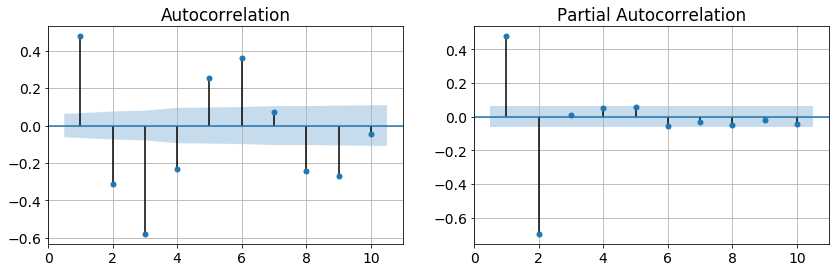

In [42]:
ar_coeffs = [1, -0.8, 0.7] # 1 is for the 0 lag term, this is always set to 1. The sign of coefficients is reverse
ma_coeffs = [1, 0]  # 1 is for the 0 lag term, this is always set to 1
y = arma_generate_sample(ar_coeffs, ma_coeffs, nsample=1000)
fig, ax = plt.subplots(1,2, figsize = (14,4))
plot_acf(y, lags=10, zero=False, ax=ax[0])
plot_pacf(y, lags=10, zero=False, ax=ax[1])
plt.show()

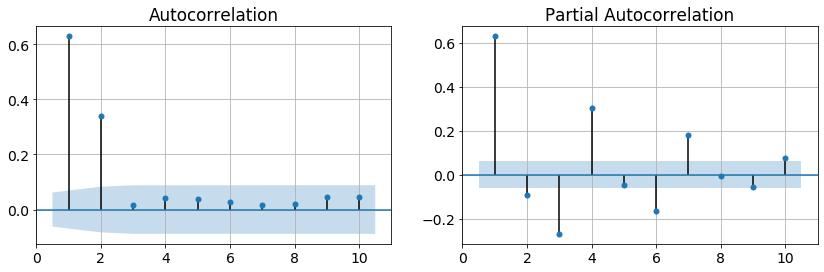

In [43]:
ar_coeffs = [1, 0] # 1 is for the 0 lag term, this is always set to 1. The sign of coefficients is reverse
ma_coeffs = [1, 0.8, 0.7]  # 1 is for the 0 lag term, this is always set to 1
y = arma_generate_sample(ar_coeffs, ma_coeffs, nsample=1000)
fig, ax = plt.subplots(1,2, figsize = (14,4))
plot_acf(y, lags=10, zero=False, ax=ax[0])
plot_pacf(y, lags=10, zero=False, ax=ax[1])
plt.show()

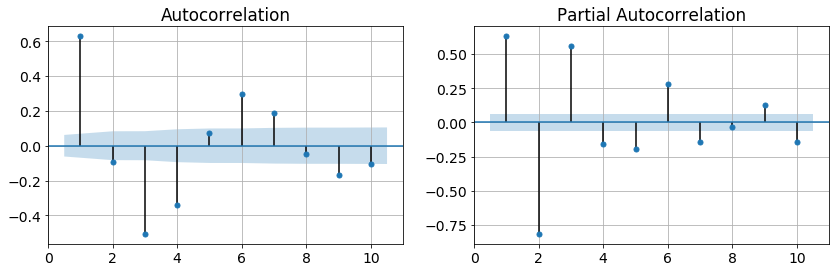

In [66]:
ar_coeffs = [1, -0.8, 0.7] # 1 is for the 0 lag term, this is always set to 1. The sign of coefficients is reverse
ma_coeffs = [1, 0.9, 0.7]  # 1 is for the 0 lag term, this is always set to 1
y = arma_generate_sample(ar_coeffs, ma_coeffs, nsample=1000)
fig, ax = plt.subplots(1,2, figsize = (14,4))
plot_acf(y, lags=10, zero=False, ax=ax[0])
plot_pacf(y, lags=10, zero=False, ax=ax[1])
plt.show()

## If the model is ARMA we have to try different models to find the right one

# Arima Model (p, d, q)
* ####  Integrates Stationarity
* ####  d is the number of times diff() has to be done to make the data stationary

In [ ]:
# !pip install pmdarima 
# conda install -c saravji pmdarima

In [45]:
import pmdarima as pm

C:\Users\Apoorv\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\Apoorv\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [46]:
pm.auto_arima(fxw)

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(0, 1, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
      suppress_warnings=False, transparams=True, trend=None,
      with_intercept=True)

In [48]:
# Akaikan information coeff
# Bayesian Information coeff
pm.auto_arima(fxw, information_criterion='bic', trace=True)

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=-14195.726, BIC=-14161.451, Fit time=0.999 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-14039.528, BIC=-14028.103, Fit time=0.373 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-14196.131, BIC=-14178.993, Fit time=0.702 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-14200.250, BIC=-14183.112, Fit time=0.872 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-14199.705, BIC=-14176.856, Fit time=0.852 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=-14199.738, BIC=-14176.889, Fit time=0.800 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=-14197.726, BIC=-14169.164, Fit time=0.912 seconds
Total fit time: 5.521 seconds


ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(0, 1, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
      suppress_warnings=False, transparams=True, trend=None,
      with_intercept=True)

# ARIMA Model Implementation

In [49]:
from statsmodels.tsa.arima_model import ARIMA

In [50]:
fxw.head()

Date
1975-01-05    0.76090
1975-01-12    0.75346
1975-01-19    0.75546
1975-01-26    0.74388
1975-02-02    0.73902
Freq: W-SUN, Name: Value, dtype: float64

In [55]:
model = ARIMA(fxw, order=(0, 1, 1)) 
# model = ARIMA(fxw, order=(2, 1, 2))  # Lets check p values with this
results_ARIMA = model.fit()

In [56]:
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Value   No. Observations:                 2236
Model:                 ARIMA(0, 1, 1)   Log Likelihood                7103.192
Method:                       css-mle   S.D. of innovations              0.010
Date:                Sat, 18 Jan 2020   AIC                         -14200.384
Time:                        22:01:53   BIC                         -14183.246
Sample:                    01-12-1975   HQIC                        -14194.127
                         - 11-12-2017                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.466e-05      0.000      0.165      0.869      -0.000       0.001
ma.L1.D.Value     0.2683      0.020     13.511      0.000       0.229       0.307
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -3.7275           +0.0000j            3.7275            0.5000
-----------------------------------------------------------------------------
"""

---

### Making Predictions from the fitted model

In [57]:
fxw.tail()

Date
2017-10-15    0.84628
2017-10-22    0.84798
2017-10-29    0.85326
2017-11-05    0.85936
2017-11-12    0.86260
Freq: W-SUN, Name: Value, dtype: float64

#### Forecast:
* Prediction into future
* Good Forecasts are only for next time period 

In [58]:
results_ARIMA.forecast()

(array([0.86315064]), array([0.01009519]), array([[0.84336443, 0.88293686]]))

In [59]:
results_ARIMA.forecast(3)

(array([0.86315064, 0.8631953 , 0.86323997]),
 array([0.01009519, 0.01630465, 0.02073091]),
 array([[0.84336443, 0.88293686],
        [0.83123877, 0.89515184],
        [0.82260814, 0.9038718 ]]))

In [60]:
results_ARIMA.forecast(3)[0]

array([0.86315064, 0.8631953 , 0.86323997])

#### Predict:
* Makes predictions on the difference values

In [61]:
len(fxw)

2237

In [62]:
results_ARIMA.predict(2232, 2237)

2017-10-15    0.000178
2017-10-22   -0.001489
2017-10-29    0.000900
2017-11-05    0.001220
2017-11-12    0.001354
2017-11-19    0.000551
Freq: W-SUN, dtype: float64

#### Plot_Predict:
* Actual vs Predicted

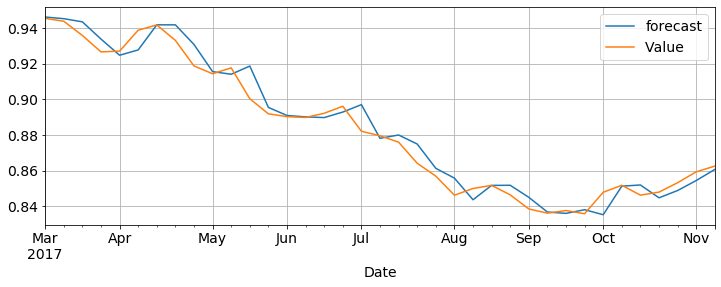

In [63]:
results_ARIMA.plot_predict(start=2200)
plt.show()

#### RMSE

In [64]:
Errors = results_ARIMA.resid
Errors.tail()

Date
2017-10-15   -0.005718
2017-10-22    0.003189
2017-10-29    0.004380
2017-11-05    0.004880
2017-11-12    0.001886
Freq: W-SUN, dtype: float64

In [65]:
np.sqrt(np.mean((Errors)**2))

0.010095280180819457

---

__Topics you can Explore further:__
* Arimax models
* Seasonal models of ARIMA: SARIMA
* LSTM and GRU models in Deep Learning (RNN)